In [1]:
import os
import pandas as pd
from PIL import Image
import torch
import torchvision.transforms as transforms
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
# Path to the dataset
images_folder = "D:/Github/Logo-creation/model/dataset/"  # Update this to your images folder
labels_csv = "data.csv"       # Update this to your labels CSV file

In [3]:
# Load labels
labels_df = pd.read_csv(labels_csv)
print(labels_df.head())  # Check the structure of the CSV file

                            Description                Name
0    logo of a two waterdrops with face               1.png
1   logo of a single smiling water drop  waterdropsmile.png
2      logo of a roaring baby dinosour      babydinosur.png
3   logo of a pink,yellow,blue fabulous        fabouls2.png
4      logo of a multicolourd fabulous          fabouls.png


In [4]:
# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize the image to 128x128
    transforms.ToTensor(),           # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

In [5]:
# Preprocess data
def preprocess_local_data(images_folder, labels_df):
    images, descriptions = [], []
    
    for _, row in labels_df.iterrows():
        image_path = os.path.join(images_folder, row['Name'])  # Assuming 'filename' column contains image filenames
        description = row['Description']  # Assuming 'label' column contains text labels
        
        try:
            image = Image.open(image_path)  # Load image
            if image.mode != 'RGB':
                image = image.convert('RGB')  # Convert to RGB if needed (for color consistency)
            
            image = transform(image)  # Apply transformations
            images.append(image)
            descriptions.append(description)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
    
    return images, descriptions

In [6]:
# Preprocess the dataset
images, descriptions = preprocess_local_data(images_folder, labels_df)

# Check the number of samples
print(f'Number of images: {len(images)}')
print(f'Number of descriptions: {len(descriptions)}')

c:\Users\rajendrak\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error loading image D:/Github/Logo-creation/model/dataset/ bwpointbeard.png: [Errno 2] No such file or directory: 'D:\\Github\\Logo-creation\\model\\dataset\\ bwpointbeard.png'
Error loading image D:/Github/Logo-creation/model/dataset/childrenplayingjumping30.png: [Errno 2] No such file or directory: 'D:\\Github\\Logo-creation\\model\\dataset\\childrenplayingjumping30.png'
Error loading image D:/Github/Logo-creation/model/dataset/.png: [Errno 2] No such file or directory: 'D:\\Github\\Logo-creation\\model\\dataset\\.png'
Error loading image D:/Github/Logo-creation/model/dataset/ png-transparent-paris-fashion-week-fashion-illustration-paris-fashion-world-illustrator-thumbnail.png: [Errno 2] No such file or directory: 'D:\\Github\\Logo-creation\\model\\dataset\\ png-transparent-paris-fashion-week-fashion-illustration-paris-fashion-world-illustrator-thumbnail.png'
Error loading image D:/Github/Logo-creation/model/dataset/f124.png: [Errno 2] No such file or directory: 'D:\\Github\\Logo-cre

In [7]:
# Sample image and description
from torchvision.transforms import ToPILImage
to_pil = ToPILImage()

sample_index = 0
image_to_show = to_pil(images[sample_index])  # Convert tensor to PIL image
image_to_show.show()
print(descriptions[sample_index])

logo of a two waterdrops with face


In [8]:
# Update text vectorizer
vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features if needed
vectorizer.fit(descriptions)  # Fit the vectorizer on the labels

TfidfVectorizer(max_features=100)

In [9]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, text_embedding_size=100):  # Adjust this based on your actual embedding size
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100 + text_embedding_size, 256),  # Update this size
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 49152),  # Update output size if needed
            nn.Tanh()
        )

    def forward(self, noise, text_embedding):
        combined_input = torch.cat((noise, text_embedding), dim=1)
        return self.model(combined_input)


In [10]:
import torch
import torch.nn as nn

In [11]:
def train_model(generator, images, descriptions, epochs=10, batch_size=32):
    criterion = nn.BCELoss()  # Define loss function
    optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)

    for epoch in range(epochs):
        for i in range(0, len(images), batch_size):
            # Get batch of images
            batch_images = images[i:i + batch_size]
            batch_images = torch.stack(batch_images).to(device)  # Move to GPU if available

            # Create random noise
            noise = torch.randn(batch_size, 100).to(device)  # Adjust noise size
            generated_images = generator(noise)

            # Calculate loss (you'll need to define how to compare generated with real)
            # Loss calculation logic goes here

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch + 1}/{epochs} completed')

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Instantiate the Generator
text_embedding_size = 100  # Adjust as per your design
generator = Generator(text_embedding_size=text_embedding_size).to(device) 
generator.to(device)

# Start training (commented out for now; will implement loss calculation first)
# train_model(generator, images, descriptions)


Generator(
  (model): Sequential(
    (0): Linear(in_features=200, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=49152, bias=True)
    (5): Tanh()
  )
)

In [12]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(49152, 512),  # Adjust based on your image size
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),  # Output a single value for real/fake
            nn.Sigmoid()  # Use Sigmoid for binary classification
        )

    def forward(self, x):
        return self.model(x)


In [13]:
discriminator = Discriminator().to(device)


Epoch [1/10], Step [1/20], D Loss: 1.4400, G Loss: 0.7536
Epoch [1/10], Step [11/20], D Loss: 0.3817, G Loss: 1.3116
End of Epoch [1/10], Avg D Loss: 0.5652, Avg G Loss: 1.0551
Epoch [2/10], Step [1/20], D Loss: 0.5938, G Loss: 0.8971
Epoch [2/10], Step [11/20], D Loss: 0.1490, G Loss: 2.3784
End of Epoch [2/10], Avg D Loss: 0.3073, Avg G Loss: 1.7288
Epoch [3/10], Step [1/20], D Loss: 0.4054, G Loss: 1.2729
Epoch [3/10], Step [11/20], D Loss: 0.1883, G Loss: 2.0496
End of Epoch [3/10], Avg D Loss: 0.4281, Avg G Loss: 2.0778
Epoch [4/10], Step [1/20], D Loss: 0.1051, G Loss: 2.6555
Epoch [4/10], Step [11/20], D Loss: 0.2006, G Loss: 2.6639
End of Epoch [4/10], Avg D Loss: 0.2976, Avg G Loss: 2.5494
Epoch [5/10], Step [1/20], D Loss: 0.1282, G Loss: 3.4059
Epoch [5/10], Step [11/20], D Loss: 0.0643, G Loss: 4.0800
End of Epoch [5/10], Avg D Loss: 0.1418, Avg G Loss: 3.5284
Epoch [6/10], Step [1/20], D Loss: 0.1305, G Loss: 3.0398
Epoch [6/10], Step [11/20], D Loss: 0.1069, G Loss: 2.748

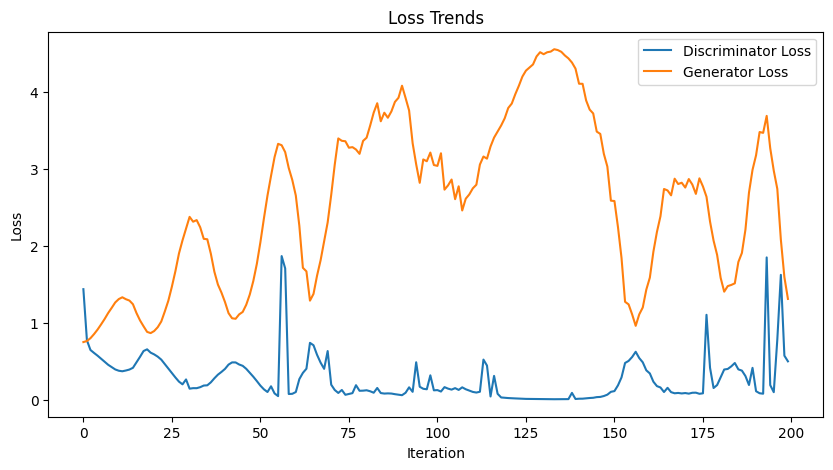

In [14]:
def train_model(generator, discriminator, images, descriptions, epochs=10, batch_size=32):
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.0002)
    optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

    # Initialize loss trackers
    d_losses = []  # Discriminator losses
    g_losses = []  # Generator losses

    for epoch in range(epochs):
        d_loss_epoch = 0
        g_loss_epoch = 0
        total_batches = len(images) // batch_size

        for i in range(0, len(images), batch_size):
            # Get a batch of images and descriptions
            batch_images = images[i:i + batch_size]
            batch_descriptions = descriptions[i:i + batch_size]

            if len(batch_images) < batch_size:
                continue  # Skip if the last batch is smaller

            batch_images = torch.stack(batch_images).to(device)

            # Convert descriptions to embeddings
            batch_embeddings = vectorizer.transform(batch_descriptions).toarray()
            batch_embeddings = torch.tensor(batch_embeddings, dtype=torch.float32).to(device)

            # Create random noise for the generator
            noise = torch.randn(batch_images.size(0), 100).to(device)  # Use current batch size

            # Generate fake images
            generated_images = generator(noise, batch_embeddings)

            # Ensure generated images are of correct shape
            generated_images = generated_images.view(batch_images.size(0), 3, 128, 128)  # Ensure shape (batch, channels, height, width)

            # Create labels for real and fake images
            real_labels = torch.ones(batch_images.size(0), 1).to(device)
            fake_labels = torch.zeros(batch_images.size(0), 1).to(device)

            # Train Discriminator
            optimizer_d.zero_grad()
            outputs = discriminator(batch_images.view(batch_images.size(0), -1))
            d_loss_real = criterion(outputs, real_labels)

            outputs = discriminator(generated_images.detach().view(generated_images.size(0), -1))
            d_loss_fake = criterion(outputs, fake_labels)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            outputs = discriminator(generated_images.view(generated_images.size(0), -1))
            g_loss = criterion(outputs, real_labels)

            g_loss.backward()
            optimizer_g.step()

            # Accumulate losses for the epoch
            d_loss_epoch += d_loss.item()
            g_loss_epoch += g_loss.item()

            # Append current losses to the tracker
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())

            # Log losses and progress
            if i % (batch_size * 10) == 0:  # Print every 10 batches
                print(f'Epoch [{epoch + 1}/{epochs}], Step [{i // batch_size + 1}/{total_batches}], '
                      f'D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

        # Print average losses for the epoch
        print(f'End of Epoch [{epoch + 1}/{epochs}], Avg D Loss: {d_loss_epoch / total_batches:.4f}, Avg G Loss: {g_loss_epoch / total_batches:.4f}')

    # Plot the loss trends after training
    plt.figure(figsize=(10, 5))
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generator Loss')
    plt.title('Loss Trends')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# Call the function to start training
train_model(generator, discriminator, images, descriptions, epochs=10, batch_size=32)


In [15]:
import pickle

# Save generator and discriminator
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

# Save vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [16]:
generator.load_state_dict(torch.load('generator.pth', weights_only=True))

<All keys matched successfully>

In [17]:
# Visualization after training
def visualize_generated_images(generator, vectorizer, descriptions, num_samples=5):
    generator.eval()
    with torch.no_grad():
        for i in range(num_samples):
            # Use a description
            desc = descriptions[i]
            desc_vector = torch.tensor(vectorizer.transform([desc]).toarray(), dtype=torch.float32).to(device)
            
            # Generate noise
            noise = torch.randn(1, 100).to(device)  # Adjust size if necessary
            
            # Generate image
            generated_image = generator(noise, desc_vector).view(3, 128, 128)  # Ensure output shape is correct
            generated_image = (generated_image + 1) / 2  # Rescale to [0, 1]
            
            # Check if generated image is non-empty
            if generated_image.sum() == 0:
                print("Warning: Generated image seems empty.")
            
            # Convert tensor to image and display
            plt.figure()
            plt.imshow(generated_image.permute(1, 2, 0).cpu().numpy())  # Convert to HWC format
            plt.title(f"Generated Image for: {desc}")
            plt.axis('off')
            
            # Save the plot to a file
            plot_filename = f"generated_image_{i}.png"
            plt.savefig(plot_filename)
            plt.show()


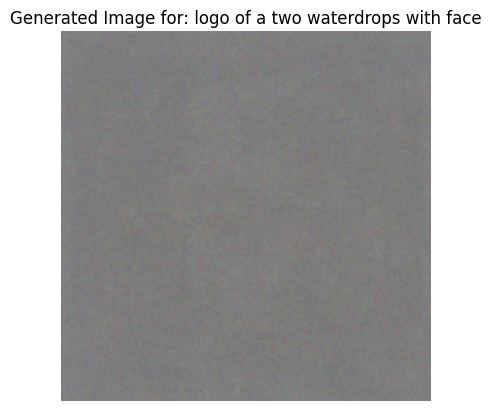

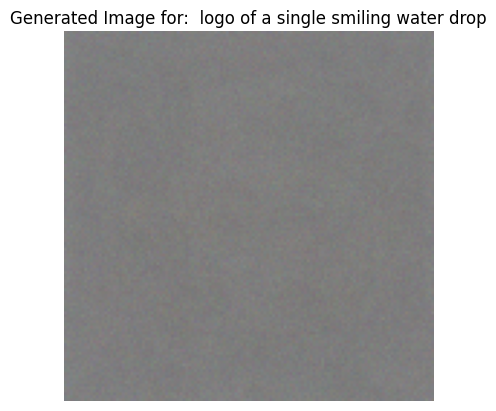

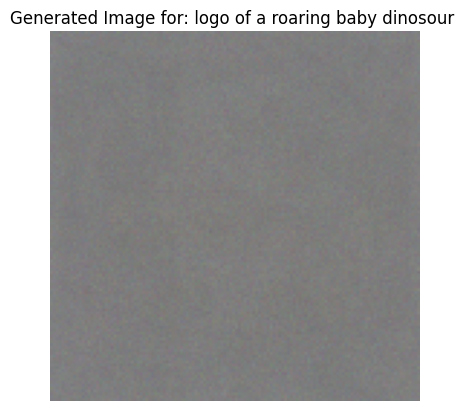

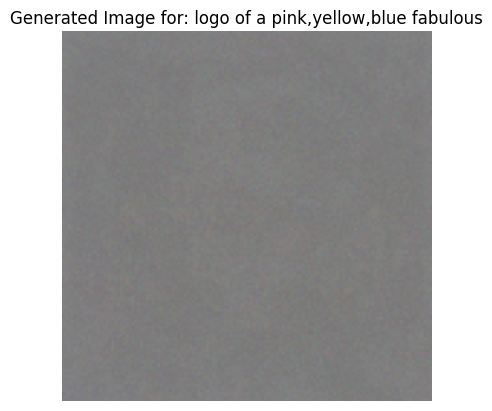

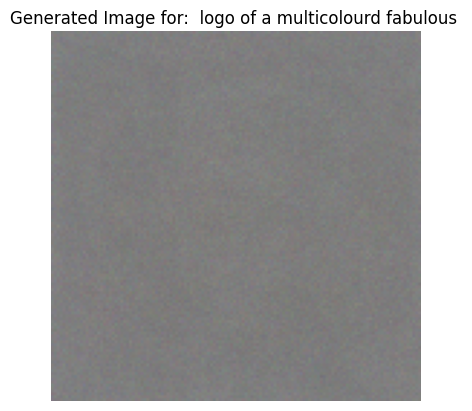

In [18]:
visualize_generated_images(generator, vectorizer, descriptions)

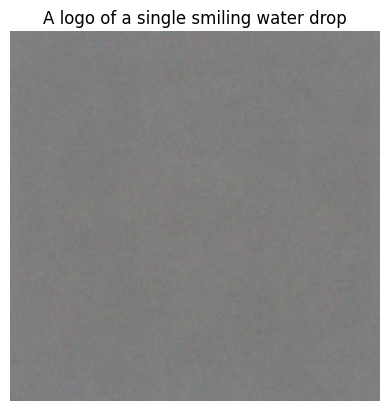

In [19]:
# Load generator
generator.load_state_dict(torch.load('generator.pth', weights_only=True))
generator.eval()

# Load vectorizer
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Generate an image for a new description
description = "A logo of a single smiling water drop"
desc_vector = torch.tensor(vectorizer.transform([description]).toarray(), dtype=torch.float32).to(device)
noise = torch.randn(1, 100).to(device)

generated_image = generator(noise, desc_vector).view(3, 128, 128)
generated_image = (generated_image + 1) / 2  # Rescale to [0, 1]

# Detach and convert to NumPy for visualization
generated_image = generated_image.detach().cpu().numpy()

# Display the generated image
plt.imshow(generated_image.transpose(1, 2, 0))  # Transpose (C, H, W) -> (H, W, C)
plt.title(description)
plt.axis('off')
plt.show()
